In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '../data/transaction_detail.csv'
df = pd.read_csv(file_path)

In [3]:
# Data Preprocessing for training data
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])
df = df.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time'], axis=1)

df['Transaction_Year'] = df['Transaction_DateTime'].dt.year
df['Transaction_Month'] = df['Transaction_DateTime'].dt.month
df['Transaction_Day'] = df['Transaction_DateTime'].dt.day
df['Transaction_Hour'] = df['Transaction_DateTime'].dt.hour
df['Transaction_Minute'] = df['Transaction_DateTime'].dt.minute

df = df.drop(['Transaction_DateTime'], axis=1)
df = pd.get_dummies(df)


In [4]:
# Split the data into features (X) and target variable (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save the Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Make predictions on the test set for evaluation
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [6]:
# Display accuracy
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 1.0


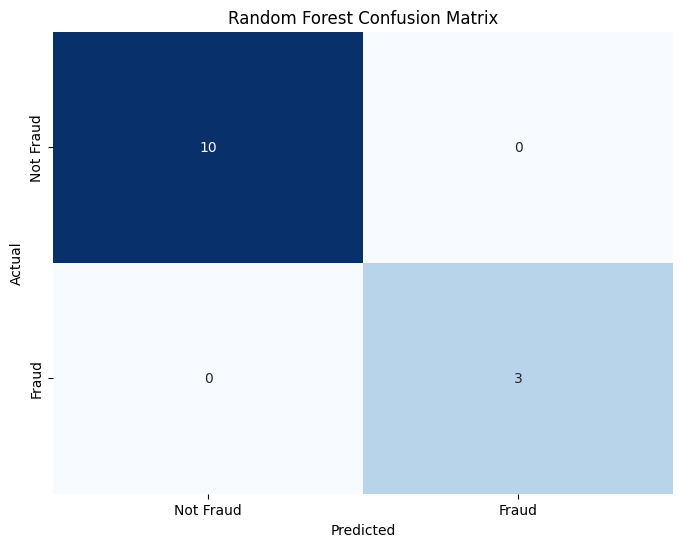

In [7]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Display Classification Report
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [9]:
# Load the Random Forest model from the pickle file
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

In [10]:
# Input data for prediction (sample data)
new_input_data_rf = {
    'Transaction_Amount': [1500],
    'User_Account_ID': [104],
    'Account_Creation_Date': ['2022-11-15'],
    'Payment_Method': ['Credit Card'],
    'Billing_Location': ['Bangalore'],
    'Shipping_Location': ['Hyderabad'],
    'Device_IP_Address': ['192.168.1.40'],
    'Session_Duration': ['500 seconds'],
    'Frequency_of_Transactions': [7],
    'Time_Between_Transactions': ['80 seconds'],
    'Unusual_Time_of_Transaction': [0],
    'Unusual_Transaction_Amounts': [0],
    'IP_Address_History': ['192.168.1.40']
}


In [11]:
# Create a DataFrame for new input
new_input_rf = pd.DataFrame(new_input_data_rf)

# Preprocess the new input data to match the training data columns
new_input_rf['Account_Creation_Date'] = pd.to_datetime(new_input_rf['Account_Creation_Date'])
new_input_rf['Session_Duration'] = new_input_rf['Session_Duration'].str.extract('(\d+)').astype(int)
new_input_rf['Time_Between_Transactions'] = new_input_rf['Time_Between_Transactions'].str.extract('(\d+)').astype(int)

# Convert categorical variables into numerical representations
new_input_rf = pd.get_dummies(new_input_rf)

# Make sure the columns in new_input_rf match the columns in X_train
missing_cols_rf = set(X_train.columns) - set(new_input_rf.columns)
for col_rf in missing_cols_rf:
    new_input_rf[col_rf] = 0

# Make sure the columns in X_train match the columns in new_input_rf
missing_cols_rf = set(new_input_rf.columns) - set(X_train.columns)
new_input_rf = new_input_rf[X_train.columns]

# Make predictions on the new input using the loaded Random Forest model
fraud_prediction_rf = loaded_rf_model.predict(new_input_rf)

C:\Users\Yash\AppData\Local\Temp\ipykernel_13476\1746980691.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_rf[col_rf] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_13476\1746980691.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_rf[col_rf] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_13476\1746980691.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [12]:
print(f"Random Forest Fraud Prediction: {fraud_prediction_rf}")


Random Forest Fraud Prediction: [0]
